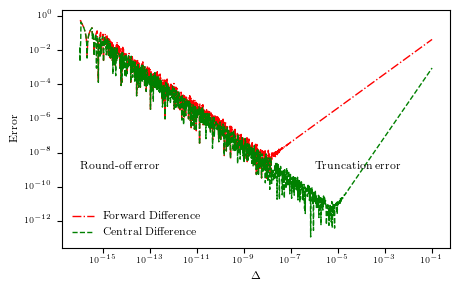

In [55]:
# Truncarion and round-off errors due to the dfinite difference approxiamtion


forward_difference_approx(f,x0,h) = (f(x0+h)-f(x0))/h 
central_difference_approx(f,x0,h) = (f(x0+h)-f(x0-h))/(2.0*h)  



step_size_array = map((i) -> 10^i,range(-16.0,stop = -1.0,step = 0.01));
f(x) = sin(x)
f_x(x) = cos(x)
x0 = 1.0;

fd = abs.(forward_difference_approx.(f, x0, step_size_array).-f_x(x0)) 
cd = abs.(central_difference_approx.(f, x0, step_size_array).-f_x(x0))

using PyPlot
figure(figsize=(width,height)) 
plt.rc("font", family="serif")
plt.rc("text", usetex=true)
plt.rc("xtick", labelsize=6)
plt.rc("ytick", labelsize=6)
plt.rc("axes", labelsize=8)
# width as measured in inkscape
width = 5
height = width/1.618


clf()

fd_fig, = loglog(step_size_array,fd,color="red",linewidth=1,linestyle="-.");
fc_fig, = loglog(step_size_array,cd,color="green",linewidth=1,linestyle="--");

legend((fd_fig,fc_fig),("Forward Difference","Central Difference"), loc = 0,frameon = false,fontsize = 8)
xlabel(L"$\Delta$",fontsize=8); ylabel("Error");
text(10^-16, 10^-9, " Round-off error",fontsize = 8)
text(10^-6, 10^-9, "Truncation error",fontsize = 8)

savefig("fd_error_types.pdf")

In [11]:
cs

1501-element Array{Float64,1}:
 -0.45969769413186023
 -0.45969769413186023
 -0.4596976941318602 
 -0.4596976941318602 
 -0.45969769413186023
 -0.4596976941318602 
 -0.4596976941318602 
 -0.45969769413186023
 -0.4596976941318603 
 -0.4596976941318603 
 -0.4596976941318603 
 -0.45969769413186023
 -0.45969769413186023
  ⋮                  
 -0.4531654178877803 
 -0.4528593230014323 
 -0.4525389711627487 
 -0.4522037065881915 
 -0.4518528441196924 
 -0.45148566798449974
 -0.4511014305099757 
 -0.45069935079244594
 -0.4502786133192527 
 -0.4498383665432512 
 -0.4493777214090755 
 -0.4488957498305975 

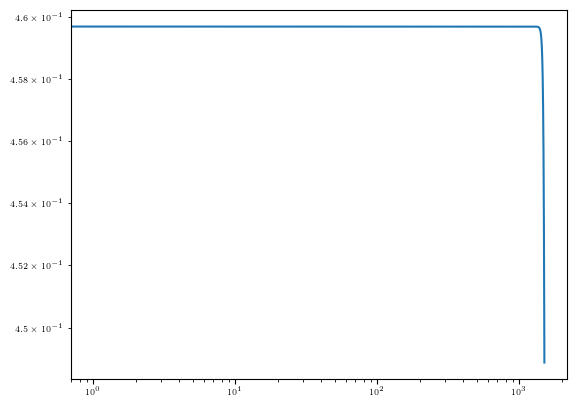

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a66c10908>

In [9]:
loglog(cs)

In [22]:
fcs_fig,

LoadError: syntax: incomplete: premature end of input

In [18]:
f_x(x0)

0.5403023058681398